In [130]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [131]:
enfermedades = pd.read_excel('archivos/CIE.xlsx')
new_df=  pd.read_csv ('archivos/NewDataAll2.csv')

C:\Users\yeyoc\AppData\Local\Temp\ipykernel_13412\1745703392.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  new_df=  pd.read_csv ('archivos/NewDataAll2.csv')


In [132]:
new_df

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,ecidif,dnadif,mnadif,nacdif,dredif,mredif,caudef,asist,ocur,cerdef
0,0,5,505,1,9,5,505,1,2,1,...,1,1,101,0,1,101,Y214,1,3,1
1,1,1,101,9,9,1,101,1,27,9,...,1,1,101,0,1,101,X919,4,3,1
2,2,22,2206,9,9,22,2206,2,23,8,...,1,1,101,0,1,101,X959,4,3,2
3,3,2,201,12,9,2,201,1,5,12,...,1,1,101,0,1,101,V899,4,3,1
4,4,1,101,5,9,1,101,2,7,5,...,2,1,101,0,1,101,X709,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953746,95996,9,901,4,2020,9,901,1,7,4,...,9,99,9999,9999,99,9999,R99X,1,1,1
953747,95997,10,1001,11,2020,10,1001,1,22,10,...,9,99,9999,9999,99,9999,J984,5,6,9
953748,95998,1,101,6,2020,1,101,1,27,6,...,9,99,9999,9999,99,9999,U071,1,1,1
953749,95999,9,901,2,2020,9,901,1,23,2,...,9,99,9999,9999,99,9999,K709,1,1,1


In [133]:
new_df['caudef']
enfermedades2 = enfermedades.copy()
enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] = enfermedades2.loc[enfermedades2['CAUSA'].str.len() == 3, 'CAUSA'] + "X"
enfermedades2

new_df2 = pd.merge(new_df, enfermedades2, left_on='caudef', right_on='CAUSA', how='left')

new_df2 = new_df2.dropna()
causas_infecciones = new_df2.loc[new_df2["DESCRIP"].str.contains("Infecciones|infecciones|infeccion|Infección|Infeccion|infección")]

causas_vih = new_df2.loc[new_df2["DESCRIP"].str.contains("VIH|vih|SIDA")]


In [134]:
new_df2['VIH'] = 0
indices_vih = new_df2[new_df2['DESCRIP'] .str.contains("VIH|vih|SIDA")].index
new_df2.loc[indices_vih, 'VIH'] = 1


In [135]:
new_df2.loc[new_df2["DESCRIP"].str.contains("VIH|vih|SIDA")]
new_df2

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,nacdif,dredif,mredif,caudef,asist,ocur,cerdef,CAUSA,DESCRIP,VIH
0,0,5,505,1,9,5,505,1,2,1,...,0,1,101,Y214,1,3,1,Y214,"Ahogamiento y sumersión, de intención no deter...",0
1,1,1,101,9,9,1,101,1,27,9,...,0,1,101,X919,4,3,1,X919,"Agresión por ahorcamiento, estrangulamiento y ...",0
2,2,22,2206,9,9,22,2206,2,23,8,...,0,1,101,X959,4,3,2,X959,"Agresión con disparo de otras armas de fuego, ...",0
3,3,2,201,12,9,2,201,1,5,12,...,0,1,101,V899,4,3,1,V899,Persona lesionada en accidente de vehículo no ...,0
4,4,1,101,5,9,1,101,2,7,5,...,0,1,101,X709,4,3,1,X709,Lesión autoinfligida intencionalmente por ahor...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953745,95995,5,501,12,2020,5,503,1,27,7,...,9999,99,9999,X480,9,6,9,X480,"Envenenamiento accidental por, y exposición a ...",0
953746,95996,9,901,4,2020,9,901,1,7,4,...,9999,99,9999,R99X,1,1,1,R99X,Otras causas mal definidas y las no especifica...,0
953747,95997,10,1001,11,2020,10,1001,1,22,10,...,9999,99,9999,J984,5,6,9,J984,Otros trastornos del pulmón,0
953749,95999,9,901,2,2020,9,901,1,23,2,...,9999,99,9999,K709,1,1,1,K709,"Enfermedad hepática alcohólica, no especificada",0


[Text(0, 0, '922577'), Text(0, 0, '5064')]

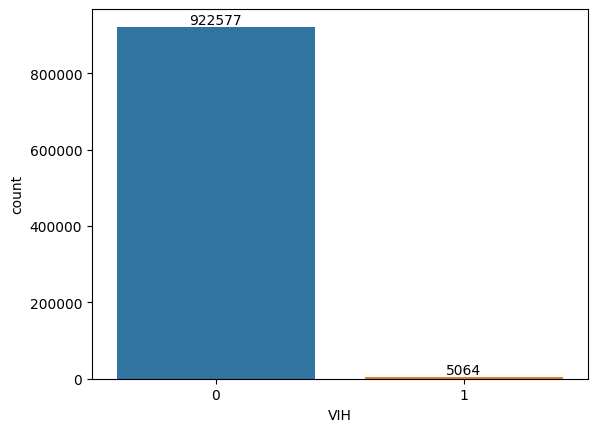

In [136]:
from seaborn import heatmap, countplot

hist = countplot(new_df2, x="VIH")
hist.bar_label(hist.containers[0])

In [137]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a pandas DataFrame called 'data' with the 'cause' column
encoder = LabelEncoder()
new_df2['caudef'] = encoder.fit_transform(new_df2['caudef'])
new_df2['CAUSA'] = encoder.fit_transform(new_df2['CAUSA'])
new_df2['DESCRIP'] = encoder.fit_transform(new_df2['DESCRIP'])

new_df2

,Unnamed: 0,depreg,mupreg,mesreg,añoreg,depocu,mupocu,sexo,diaocu,mesocu,...,nacdif,dredif,mredif,caudef,asist,ocur,cerdef,CAUSA,DESCRIP,VIH
0,0,5,505,1,9,5,505,1,2,1,...,0,1,101,3337,1,3,1,3337,169,0
1,1,1,101,9,9,1,101,1,27,9,...,0,1,101,3240,4,3,1,3240,129,0
2,2,22,2206,9,9,22,2206,2,23,8,...,0,1,101,3262,4,3,2,3262,80,0
3,3,2,201,12,9,2,201,1,5,12,...,0,1,101,2849,4,3,1,2849,2490,0
4,4,1,101,5,9,1,101,2,7,5,...,0,1,101,3186,4,3,1,3186,1690,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953745,95995,5,501,12,2020,5,503,1,27,7,...,9999,99,9999,3123,9,6,9,3123,989,0
953746,95996,9,901,4,2020,9,901,1,7,4,...,9999,99,9999,2823,1,1,1,2823,2095,0
953747,95997,10,1001,11,2020,10,1001,1,22,10,...,9999,99,9999,1572,5,6,9,1572,2373,0
953749,95999,9,901,2,2020,9,901,1,23,2,...,9999,99,9999,1751,1,1,1,1751,868,0


In [138]:
import pandas as pd
#import numpy as np

# Iterate over each column and replace non-numeric values with 0
for column in data.columns:
    new_df2[column] = pd.to_numeric(data[column], errors='coerce').fillna(0)

# Continue with your data analysis using the modified dataframe


In [139]:
# Filtrar las características y la variable objetivo
#X = new_df2[['Depreg', 'Mupreg', 'Mesreg', 'Añoreg', 'Depocu', 'Mupocu', 'Sexo', 'Diaocu', 'Mesocu', 'Añoocu', 'Edadif', 'Perdif', 'Ecidif', 'Dnadif', 'Nacdif', 'Dredif', 'Mredif', 'Asist', 'Ocur', 'Cerdef']]
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

X = new_df2.drop('VIH', axis=1)
y = new_df2["VIH"]


#X = new_df2[['Edadif']]
#y = new_df2['VIH']
# Balancear las clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)




In [140]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
linReg = LinearRegression()
linReg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = linReg.predict(X_test)

print("RMSE:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2:", (metrics.r2_score(y_test, y_pred)))

RMSE: 0.25042866270621406
R2: 0.7491418621683655


In [141]:
scores = cross_val_score(linReg, X, y, cv = 5, scoring='neg_mean_squared_error')

print("Cross Validation Scores: ", -scores)
print("Average CV Score: ", -scores.mean())

Cross Validation Scores:  [1.47154453e+01 5.89475357e-03 4.77812270e-03 3.95887090e-03
 3.32884282e-03]
Average CV Score:  2.946681174176296


In [142]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
logReg1 = LogisticRegression(solver='liblinear')
logReg1.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logReg1.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)


Confussion Matrix
[[180102   4311]
 [   244 184374]] 

Accuracy: 0.9876568635155312
Precission: 0.9878937507540672
Recall:  0.9876568635155312
F1 Score:  0.9876552885775697
Sensitivity: 0.9986783520566792
Specificity: 0.9766231230986969


In [143]:
scores = cross_val_score(logReg1, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.99221685 0.99267496 0.99456147 0.99490643 0.99451296]
Average CV Score:  0.99377453299033


In [144]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
logReg2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100)
logReg2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logReg2.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred, zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred, zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confussion Matrix
[[180093   4320]
 [   246 184372]] 

Accuracy: 0.987627055721606
Precission: 0.9771055476649778
Recall:  0.9986675188768159
F1 Score:  0.9877688784120436
Sensitivity: 0.9986675188768159
Specificity: 0.9765743195978591


In [145]:
scores = cross_val_score(logReg2, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross Validation Scores:  [0.99054595 0.99113341 0.99450757 0.99460459 0.99456686]
Average CV Score:  0.9930716759239011


c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
logReg3 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
logReg3.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = logReg3.predict(X_test)

cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred, zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred, zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confussion Matrix
[[179852   4561]
 [   272 184346]] 

Accuracy: 0.9869035392690587
Precission: 0.9758558444102124
Recall:  0.9985266875385932
F1 Score:  0.987061107020949
Sensitivity: 0.9985266875385932
Specificity: 0.9752674702976472


In [147]:
scores = cross_val_score(logReg3, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Cross Validation Scores:  [0.99228692 0.99272886 0.99420034 0.99521366 0.99471778]
Average CV Score:  0.9938295111391057


c:\Users\yeyoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [148]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier


# Crear una instancia del modelo SVM y entrenarlo con diferentes parámetros
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rfr.predict(X_test)

In [149]:
print("RMSE:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2:", (metrics.r2_score(y_test, y_pred)))

RMSE: 0.002450216455024807
R2: 0.9999759857498836


In [150]:
scores = cross_val_score(rfr, X, y, cv = 5, scoring='neg_mean_squared_error')

print("Cross Validation Scores: ", -scores)
print("Average CV Score: ", -scores.mean())

Cross Validation Scores:  [3.77299506e-09 1.83260748e-08 2.34951059e-06 2.37214868e-06
 5.71396231e-06]
Average CV Score:  2.091544129432759e-06


In [151]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf.predict(X_test)

In [152]:
cm = metrics.confusion_matrix(y_test,y_pred)

print("Confussion Matrix")
print(cm,"\n")
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precission:", metrics.precision_score(y_test,y_pred,average='weighted', zero_division=0))
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted', zero_division=0))
print ("F1 Score: ", metrics.f1_score(y_test,y_pred,average='weighted'))

# Calcular la precisión (accuracy), sensibilidad (sensitivity) y especificidad (specificity)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

true_negative = confusion[0, 0]
false_positive = confusion[0, 1]
false_negative = confusion[1, 0]
true_positive = confusion[1, 1]

sensitivity = true_positive / (true_positive + false_negative)
specificity = true_negative / (true_negative + false_positive)

# Imprimir los resultados
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Confussion Matrix
[[184413      0]
 [     0 184618]] 

Accuracy: 1.0
Precission: 1.0
Recall:  1.0
F1 Score:  1.0
Sensitivity: 1.0
Specificity: 1.0


In [153]:
scores = cross_val_score(rf, X, y, cv = 5, scoring='accuracy')

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.59239256 1.         0.99998922 0.99997844 0.99998922]
Average CV Score:  0.9184698887579621
